<a href="https://colab.research.google.com/github/lauracantik/mathtools/blob/main/Tugas06_Adhikaaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
from matplotlib import pyplot as plt

# Statistics
from statistics import median,mean, stdev
from scipy import signal

import scipy.stats as stats
from scipy.stats import poisson, norm
from scipy.special import factorial

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/adhikaaa/google-collab/main/student-mat-pass-or-fail.csv')
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.883544,0.526582,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,1.448101,2.035443,...,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.670886
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,...,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.470487
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,1.000000,1.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,1.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,1.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


In [7]:
def find_mean(ls:list):
   
    if ls:
       
        return(sum(ls)/len(ls))
    else:
        return 0
print("Mean for absences    : ",find_mean(list(df['absences'])))
print("Mean for health      : ",find_mean(list(df['health'])))
print("Mean for freetime    : ",find_mean(list(df['freetime'])))
print("Mean for studytime   : ",find_mean(list(df['studytime'])))

Mean for absences    :  5.708860759493671
Mean for health      :  3.5544303797468353
Mean for freetime    :  3.2354430379746835
Mean for studytime   :  2.0354430379746837


In [8]:
def calculate_variance(ls:list):
   
    mean = find_mean(ls)
    if mean!=0:
        return sum((i - mean) ** 2 for i in ls) / len(ls)
    else:
        return 0
    
print("Variance for absences    : ",calculate_variance(list(df['absences'])))
print("Variance for health      : ",calculate_variance(list(df['health'])))
print("Variance for freetitme   : ",calculate_variance(list(df['freetime'])))
print("Variance for studytime   : ",calculate_variance(list(df['studytime'])))

Variance for absences    :  63.887389841371515
Variance for health      :  1.9280499919884664
Variance for freetitme   :  0.9951994872616567
Variance for studytime   :  0.7025412594135564


In [9]:
def calculate_standard_deviation(ls:list):
    return calculate_variance(ls)**(1/2)

print("Standard Devation for absences   : ",calculate_standard_deviation(list(df['absences'])))
print("Standard Devation for health     : ",calculate_standard_deviation(list(df['health'])))
print("Standard Devation for freetime   : ",calculate_standard_deviation(list(df['freetime'])))
print("Standard Devation for studytime  : ",calculate_standard_deviation(list(df['studytime'])))

Standard Devation for absences   :  7.992958766400057
Standard Devation for health     :  1.3885423983402403
Standard Devation for freetime   :  0.9975968560804794
Standard Devation for studytime  :  0.8381773436532131


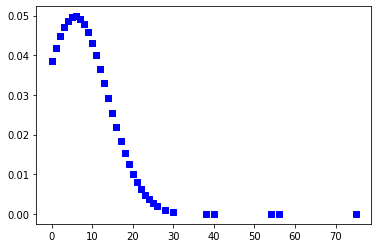

In [16]:
mean_absences = mean(df['absences'])
sd_absences = stdev(df['absences'])
normal_df = norm.pdf(df['absences'],loc = mean_absences, scale = sd_absences)
plt.plot(df['absences'], normal_df, 'bs')
plt.show()

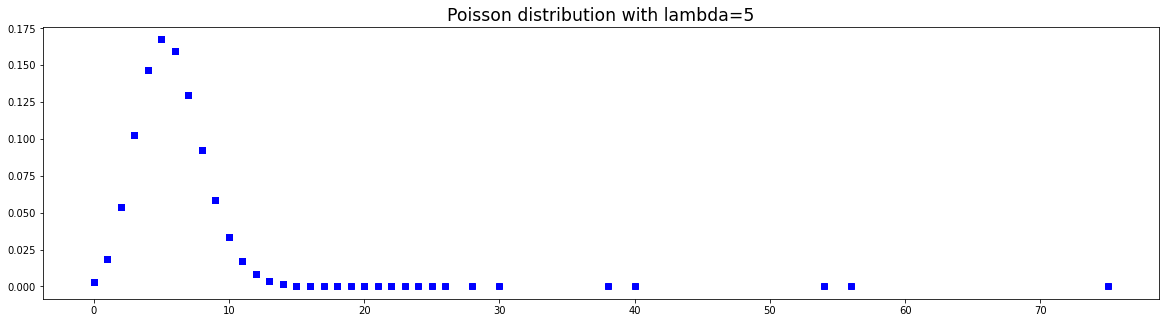

In [18]:
x=pd.Series(df['absences']).to_numpy()

y = np.exp(-mean_absences)*np.power(mean_absences, x)/factorial(x)

plt.figure(figsize=(20,5))
plt.title('Poisson distribution with lambda=5', fontsize='xx-large')
plt.plot(x, y, 'bs')
plt.show()